# Dask Mistakes

This notebook contains examples of what not do with Dask, and explanations if possible.

## Processing single netCDF file

Can Dask read different chunks of a netCDF file in parallel and process? Maybe! Not sure on whether netCDF files can be saved with a chunking that is good for such a thing. But here is an experiment with files that are certainly not chunked: read a precipitation file and take the sum over the time dimension:

In [1]:
from dask.distributed import Client
import xarray as xr

Set up the client which starts a local cluster:

In [2]:
# specifying arbitrary address to avoid warning of port 8787 not being available
client = Client(dashboard_address="localhost:43368", n_workers=4)

#### Dask

First try using dask with chunking:

In [3]:
fp = "/Data/Base_Data/Climate/AK_CORDEX/hist/pr/ARC44_hist_pr_CCCma-CanESM2_UQAM-CRCM5_ERA5bc.nc"
temp = xr.open_dataset(fp, chunks={"time": 50})

Run the computation:

In [4]:
%%time
# subsetting over years to speed up a bit
time_sl = slice("1990", "2010")
clim = temp["pr"].sel(time=time_sl).sum(dim="time").compute()

CPU times: user 5.45 s, sys: 1.05 s, total: 6.51 s
Wall time: 45.1 s


CPU times: user 1.06 s, sys: 156 ms, total: 1.22 s
Wall time: 1.39 s


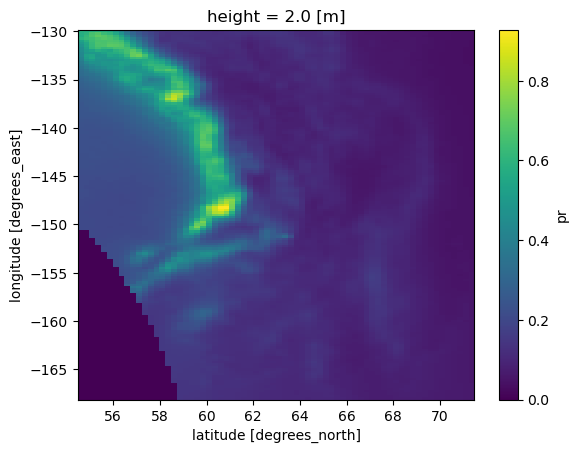

In [5]:
%%time
clim.plot()

#### No Dask

In [6]:
# different file to get around caching
fp = "/Data/Base_Data/Climate/AK_CORDEX/hist/pr/ARC44_hist_pr_ICHEC-EC-EARTH_SMHI-RCA4-SN_ERA5bc.nc"
temp2 = xr.open_dataset(fp)

In [7]:
%%time
clim = temp2["pr"].sel(time=time_sl).sum(dim="time")

CPU times: user 2.38 s, sys: 805 ms, total: 3.18 s
Wall time: 25.2 s


CPU times: user 84.8 ms, sys: 4.6 ms, total: 89.4 ms
Wall time: 81.4 ms


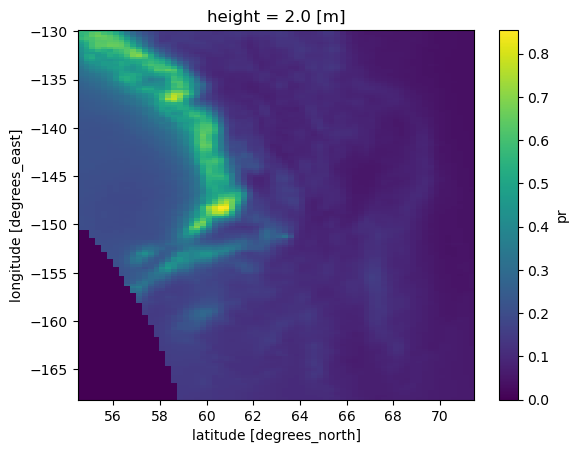

In [8]:
%%time
clim.plot()

In [9]:
client.close()